Picture Taken
Picture Taken


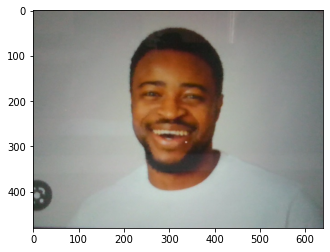

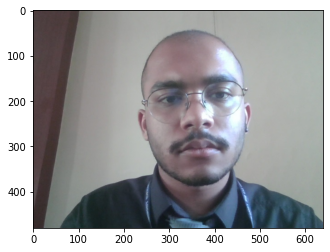

Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


[{'emotion': {'angry': 0.0026498897568671964, 'disgust': 1.4246454327349056e-05, 'fear': 0.0005970328402327141, 'happy': 99.45055842399597, 'sad': 0.003138334068353288, 'surprise': 0.08033189224079251, 'neutral': 0.46271500177681446}, 'dominant_emotion': 'happy', 'region': {'x': 200, 'y': 100, 'w': 216, 'h': 216}}]
[{'emotion': {'angry': 0.006362483691191301, 'disgust': 5.974365425119588e-11, 'fear': 0.00033925944080692716, 'happy': 9.376231560054293e-05, 'sad': 0.016135608893819153, 'surprise': 8.989759692212829e-06, 'neutral': 99.97705817222595}, 'dominant_emotion': 'neutral', 'region': {'x': 206, 'y': 67, 'w': 316, 'h': 316}}]
happy
99.45055842399597
neutral
99.97705817222595



    Error 263 for command:
        open neutral.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close neutral.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: neutral.mp3


PlaysoundException: 
    Error 263 for command:
        open neutral.mp3
    The specified device is not open or is not recognized by MCI.

In [49]:
import boto3
import cv2
import tkinter.messagebox
from PIL import Image 
import matplotlib.pyplot as plt
from deepface import DeepFace
from tkinter import*
from tkinter import messagebox
from playsound import playsound

# from time import sleep

#image counter 
img_counter = 0
# list of recent images taken
recent_images = []
results = []

#Function for the expression detection
def  expressionOutput():
    # read image
    
    
        
    img1 = cv2.imread("img_0.jpg")
    img2 = cv2.imread("img_1.jpg")
  
    # call imshow() using plt object
    plt.imshow(img1[:,:,::-1])
    # display that image
    plt.show()
    
    # call imshow() using plt object
    plt.imshow(img2[:,:,::-1])
    # display that image
    plt.show()

        # storing the result
    result1 = DeepFace.analyze(img1,actions=['emotion'])
    result2 = DeepFace.analyze(img2,actions=['emotion'])
    print(result1)
    print(result2)
        # print result
    dom1=dict(result1[0]).get("dominant_emotion")
    print(dom1)
    val1=(dict(result1[0]).get("emotion").get(dom1))
    print(val1)

    dom2=dict(result2[0]).get("dominant_emotion")
    print(dom2)
    val2=(dict(result2[0]).get("emotion").get(dom2))
    print(val2)


    if(val1>val2):
        # messagebox.showinfo("showinfo","Player 1 : "+dom1+" : "+val1+"\n"+"Player 2 : "+dom2+" : "+val2)
        
        messagebox.showinfo("showinfo","Winner : Player 1 : "+dom1)
        playSong(dom1)
        # results.append(result)
    else:
        # messagebox.showinfo("showinfo","Player 1 : "+dom1+" : "+val1+"Player 2 : "+dom2+" : "+val2)
        
        messagebox.showinfo("showinfo","Winner : Player 2 : "+dom2)
        playSong(dom2)

    #playSong(result)

def playSong(name):
    songname=(name+".mp3")
    playsound(songname)
    print (songname)

#cv2 to allow camera to take pic 
pic = cv2.VideoCapture(0)

#title of the frame
# cv2.namedWindow('Click Spacebar to Click Photo')

#if true then
while True:

    
    ret, frame = pic.read()

    cv2.imshow('Click SpaceBar to take Picture', frame)
    # if message==0:
    #     tkinter.messagebox.showinfo("Info","Press SPACEBAR to take Picture")
    #     message+=1
    # else:
    #     break
    if cv2.waitKey(32) & 0xFF == ord(' '):
        img_name = f'img_{img_counter}'
        tkinter.messagebox.showinfo("Congrats",f"Image captured! Name: {img_name} ")
        # saves the image as a png file

        cv2.imwrite(filename=f'img_{img_counter}.jpg', img=frame)
        recent_images.append(f"img_{img_counter}.jpg")
        # cv2.imwrite(img_name, frame)
        
        print('Picture Taken')
        # the number of images automaticallly increases by 1
        img_counter += 1
        
        # break
    elif cv2.waitKey(27) & 0xFF == ord('q'):
        break
       

pic.release()
cv2.destroyAllWindows()
expressionOutput()
recent_images=[]